<a href="https://colab.research.google.com/github/KhanradCoder/LearnMachineLearning/blob/master/1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
We will perform linear regression on data from a study comparing father heights to the heights of their sons. You can view the original datset [here](https://www.kaggle.com/abhilash04/fathersandsonheight)

In [0]:
import pandas as pd
dataset = pd.read_csv("fathersonheight.csv")
print(dataset.head())

x = dataset['Father'].values.reshape(-1,1)
y = dataset['Son'].values

Now let's fit linear regression to our model

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

We can plot our data compare it to our model's predictions

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color = 'blue')
plt.plot(x, lin_reg.predict(x), color = 'red', linewidth=5)
plt.title('Father Height vs Son Height')
plt.xlabel('Father Height')
plt.ylabel('Son Height')
plt.show()

# Polynomial Regression
But what if our relationship doesn't fit a linear relationship? In that case, we use polynomial features. Make sure you have the optimum # of degrees for your model 

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In the case of this dataset, there is no real non-linear relationship, however, you can see the graph flattens a bit at the beginning and end, which more accurately fits the data distribution.

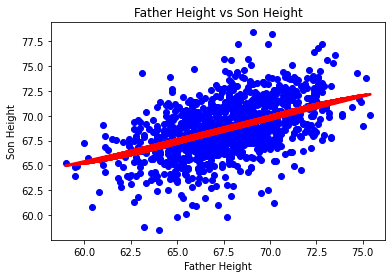

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color = 'blue')
plt.plot(x, lin_reg_poly.predict(poly.fit_transform(x)), color = 'red', linewidth=3)
plt.title('Father Height vs Son Height')
plt.xlabel('Father Height')
plt.ylabel('Son Height')
plt.show()

# Multiple Linear Regression
What if we want to use multiple explanatory variables? For this we will use a dataset of university graduate admissions. We will then build a model that predicts the likelyhood of admission based on test scores, university prestige, and more. You can view the original dataset [here](https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict.csv)

In [0]:
import pandas as pd
dataset = pd.read_csv('admissiondata.csv')

x = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 7].values

FileNotFoundError: ignored

Here we ciphen off a small part of the data for testing the model's accuracy. By saving some of our data for later, we can test it on the model to make sure the model works well on examples it hasn't seen yet.

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

NameError: ignored

In [0]:
from sklearn.preprocessing import PolynomialFeatures

multi_poly = PolynomialFeatures(degree = 4)
x_poly = multi_poly.fit_transform(x_train)
multi_poly.fit(x_poly, y_train)

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(x_poly, y_train)

Now let's evaluate our model with the test data.
 We compute our error (or how far off our predicted output is from the test data) using this equation, which is the sum of the differences between our predicted and actual test data values squared and divided by the number of test samples.


![meansquared error formula](https://miro.medium.com/max/610/1*T37cOEU9OkXNPuqGQcXHSA.png)

In [0]:
y_preds = lin_reg_multi.predict(multi_poly.fit_transform(x_test))

from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_preds))

0.019896552627420846


We can see that using 2 degrees gives us the lowest loss. This gives us the most optimal version of our model